In [1]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
# Only for final delivery
import warnings
warnings.filterwarnings('ignore')
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
# Libraries models
import pandas as pd
import numpy as np
from collections import Counter
from time import time
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
# Import the necessary module's
from scipy.stats import chi2
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# library to save the models
import joblib
# import home made function
from utils import get_na, plot_pie,traine, test

In [2]:
path = os.getcwd() + '/data/interim/model_data_train_ohe_outlier.csv' 
X_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/model_data_test_ohe_outlier.csv' 
X_test = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_train_ohe_outlier.csv' 
y_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_test_ohe_outlier.csv' 
y_test = pd.read_csv(path, sep=',')['atraso_15']

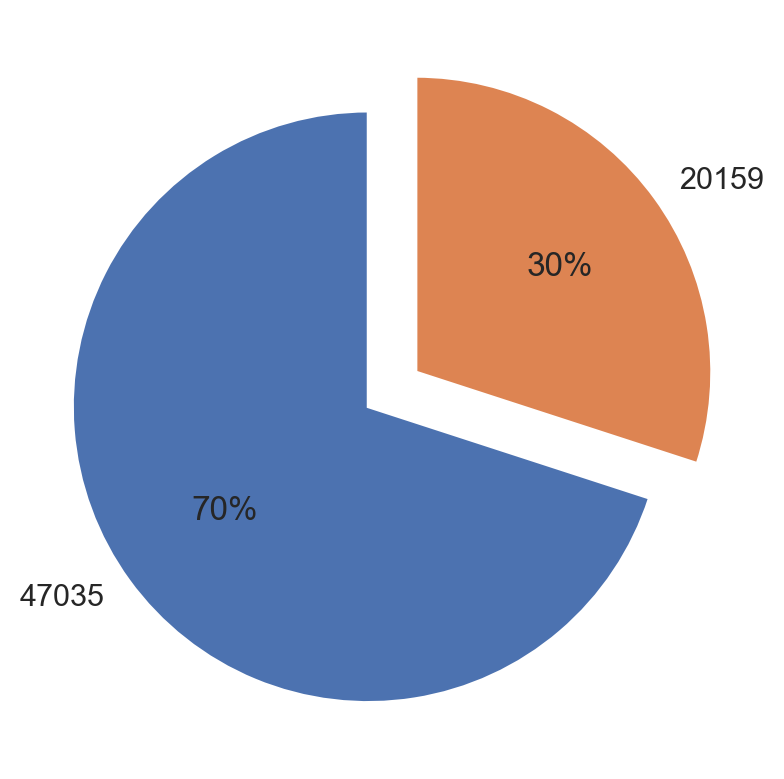

In [3]:
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#create pie chart
plt.pie(data, labels = labels,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()

Información del dataset:
 las clases del target son: Counter({0: 38431, 1: 8604})


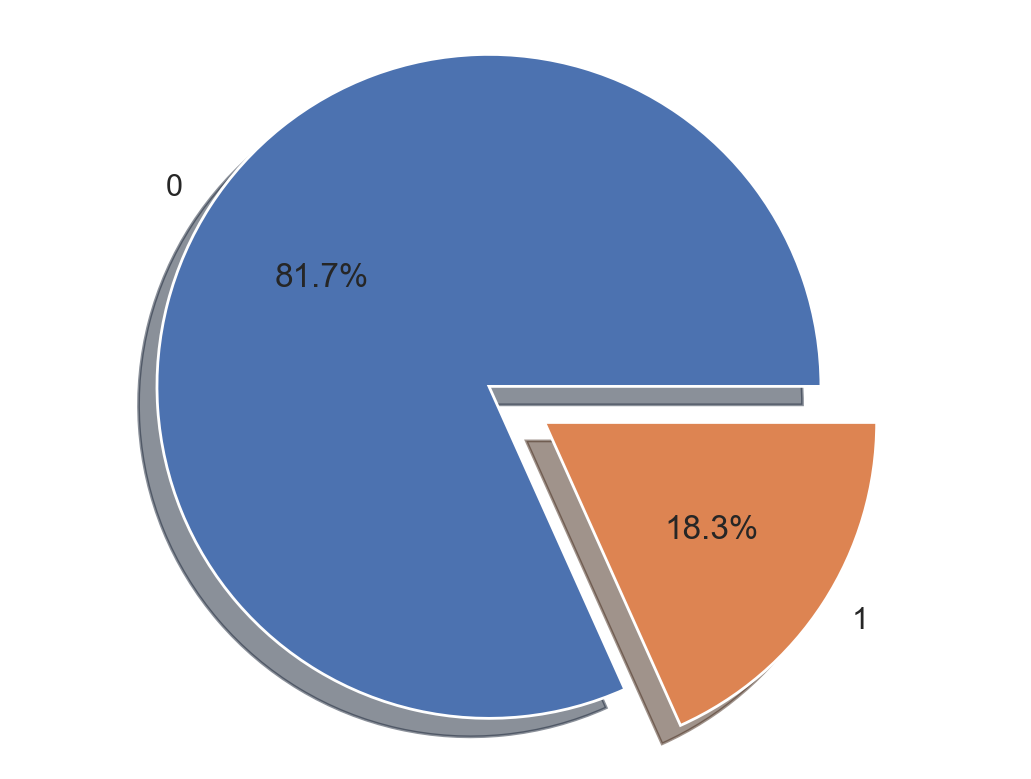

In [4]:
print('Información del dataset:'
      '\n las clases del target son: {}'.format(Counter(y_train.atraso_15)))
plot_pie(y_train.atraso_15)

In [5]:
clf = ComplementNB(alpha=0.1,class_prior = [0.815,0.185] )
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6921251883127312
EL ROC AUC Score es: 0.6984732694964245
              precision    recall  f1-score   support

           0       0.89      0.67      0.76     16472
           1       0.29      0.62      0.40      3687

    accuracy                           0.66     20159
   macro avg       0.59      0.64      0.58     20159
weighted avg       0.78      0.66      0.70     20159



Predicted class,False,True,All
Actual class,,,
0,10971,5501,16472
1,1387,2300,3687
All,12358,7801,20159


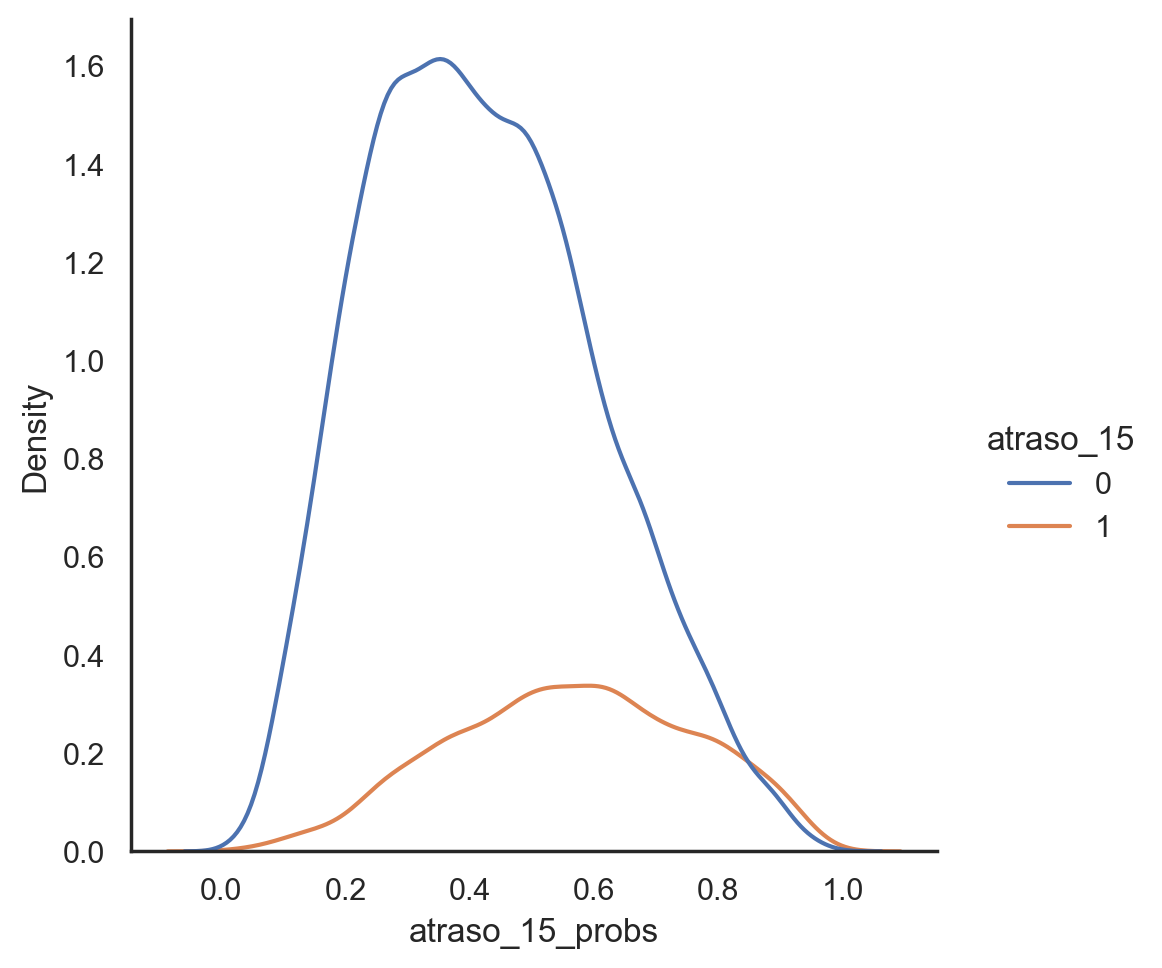

In [6]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [7]:
clf = DecisionTreeClassifier(random_state=0, max_features='sqrt',criterion='gini',
                             min_samples_split=0.001)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7680627464280536
EL ROC AUC Score es: 0.656502695173689
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16472
           1       0.42      0.18      0.25      3687

    accuracy                           0.81     20159
   macro avg       0.63      0.56      0.57     20159
weighted avg       0.76      0.81      0.77     20159



Predicted class,False,True,All
Actual class,,,
0,15587,885,16472
1,3039,648,3687
All,18626,1533,20159


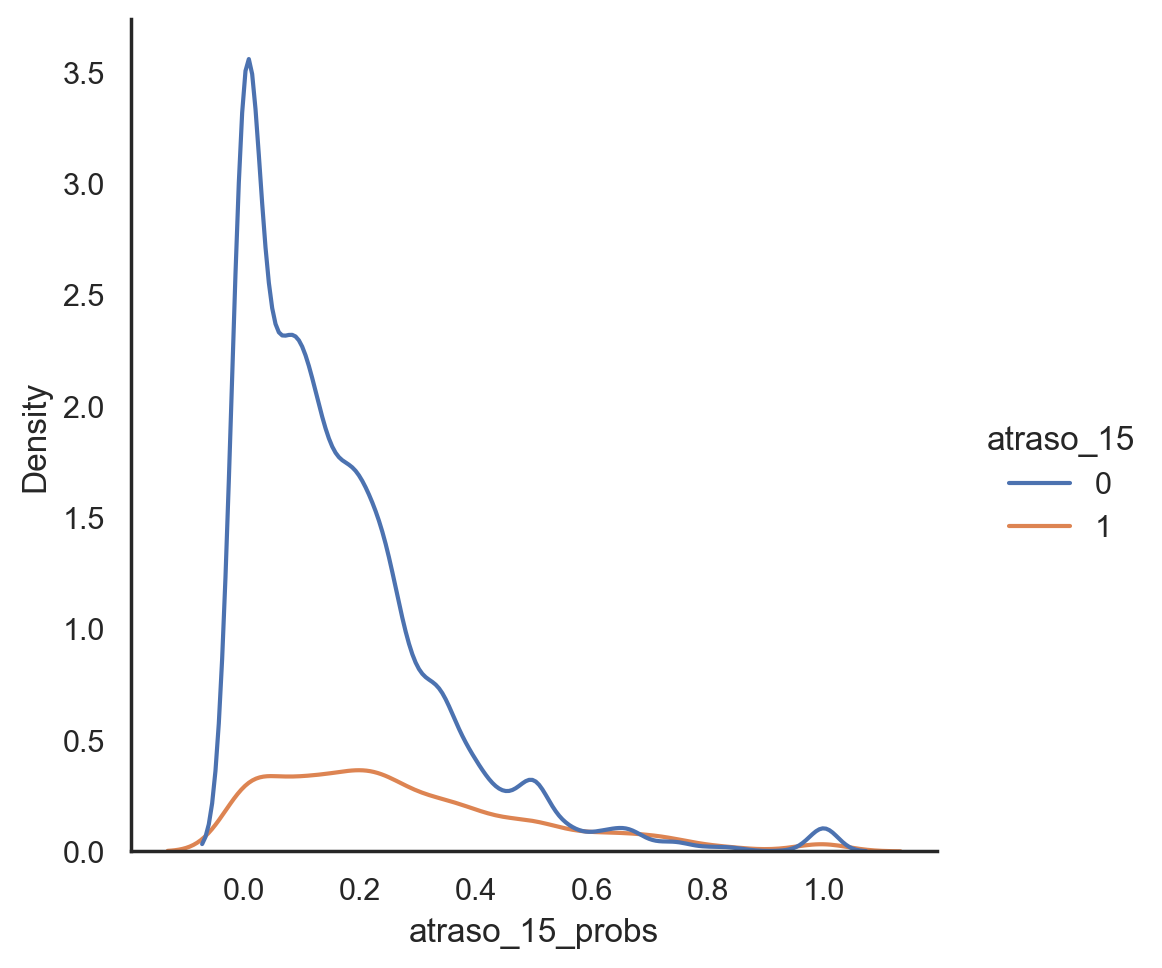

In [8]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [9]:
clf = LogisticRegression()
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7640681548573282
EL ROC AUC Score es: 0.7028221934884562
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16472
           1       0.56      0.08      0.15      3687

    accuracy                           0.82     20159
   macro avg       0.69      0.53      0.52     20159
weighted avg       0.78      0.82      0.76     20159



Predicted class,False,True,All
Actual class,,,
0,16227,245,16472
1,3375,312,3687
All,19602,557,20159


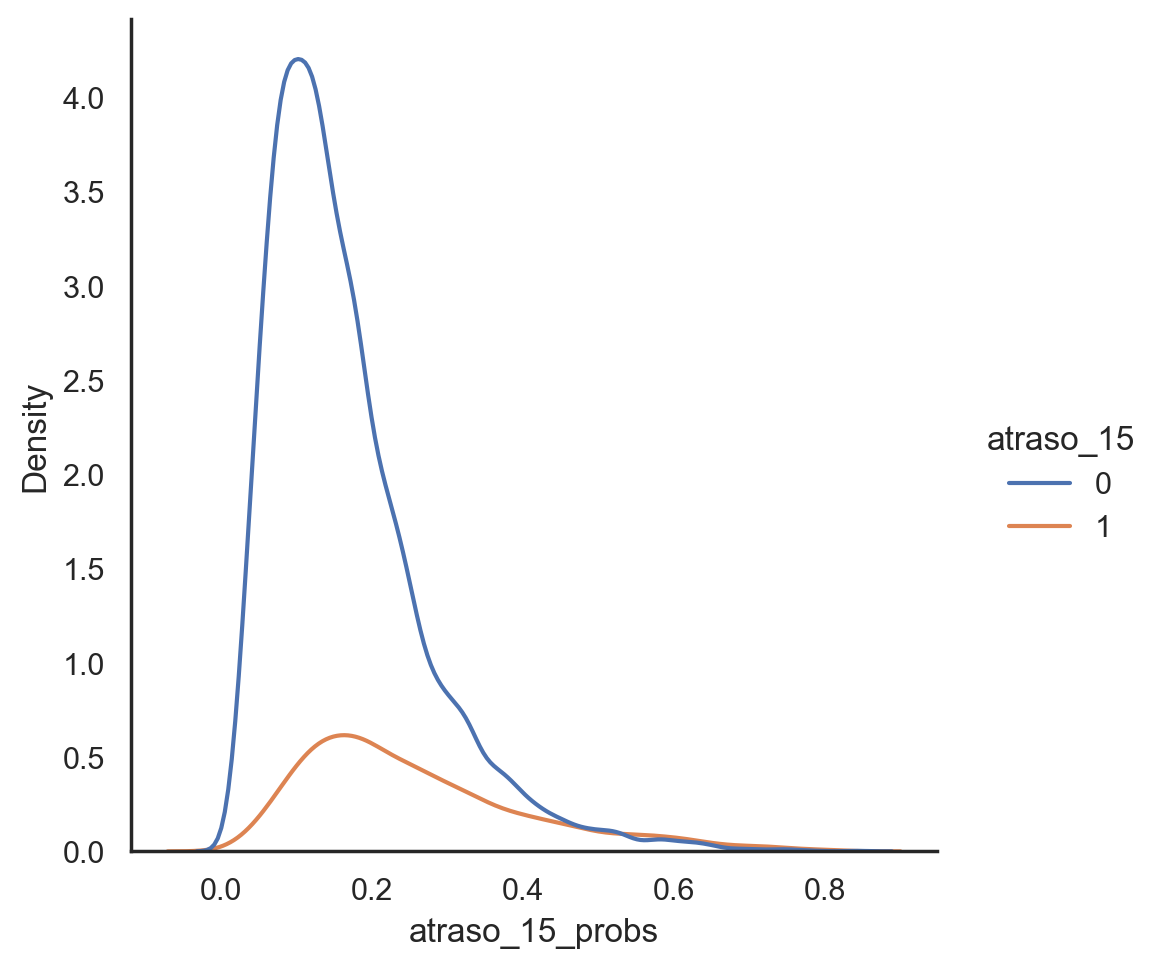

In [10]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [11]:
clf = RandomForestClassifier(n_estimators=500,random_state=0,warm_start=True,criterion='gini',
                             bootstrap=True,max_features='sqrt')
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7726983139321002
EL ROC AUC Score es: 0.6997319826575212
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     16472
           1       0.43      0.21      0.29      3687

    accuracy                           0.81     20159
   macro avg       0.64      0.58      0.59     20159
weighted avg       0.77      0.81      0.78     20159



Predicted class,False,True,All
Actual class,,,
0,15440,1032,16472
1,2895,792,3687
All,18335,1824,20159


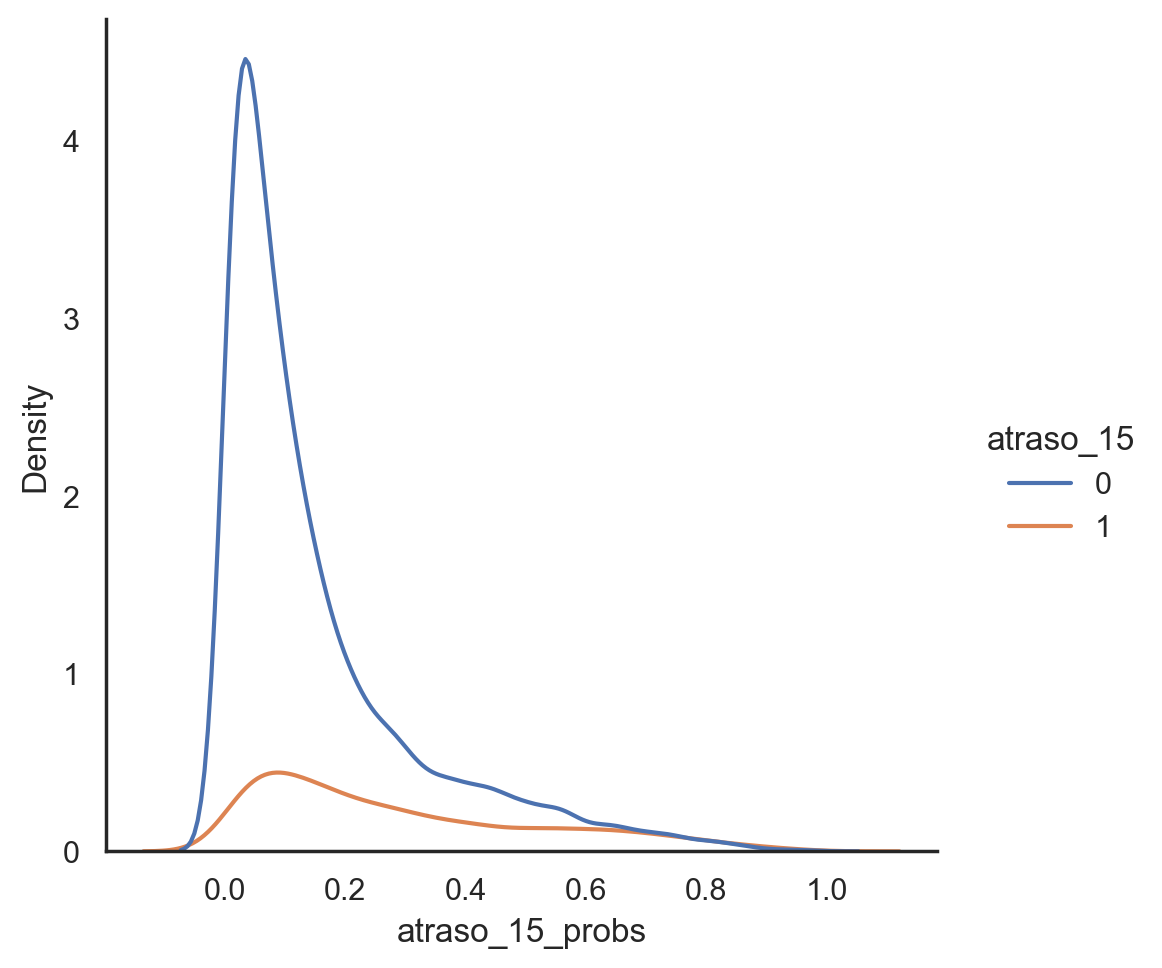

In [12]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [13]:
clf = XGBClassifier(random_state=0,verbosity = 0)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7704205801618998
EL ROC AUC Score es: 0.7237620023518306
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16472
           1       0.62      0.11      0.18      3687

    accuracy                           0.82     20159
   macro avg       0.72      0.55      0.54     20159
weighted avg       0.79      0.82      0.77     20159



Predicted class,False,True,All
Actual class,,,
0,16228,244,16472
1,3295,392,3687
All,19523,636,20159


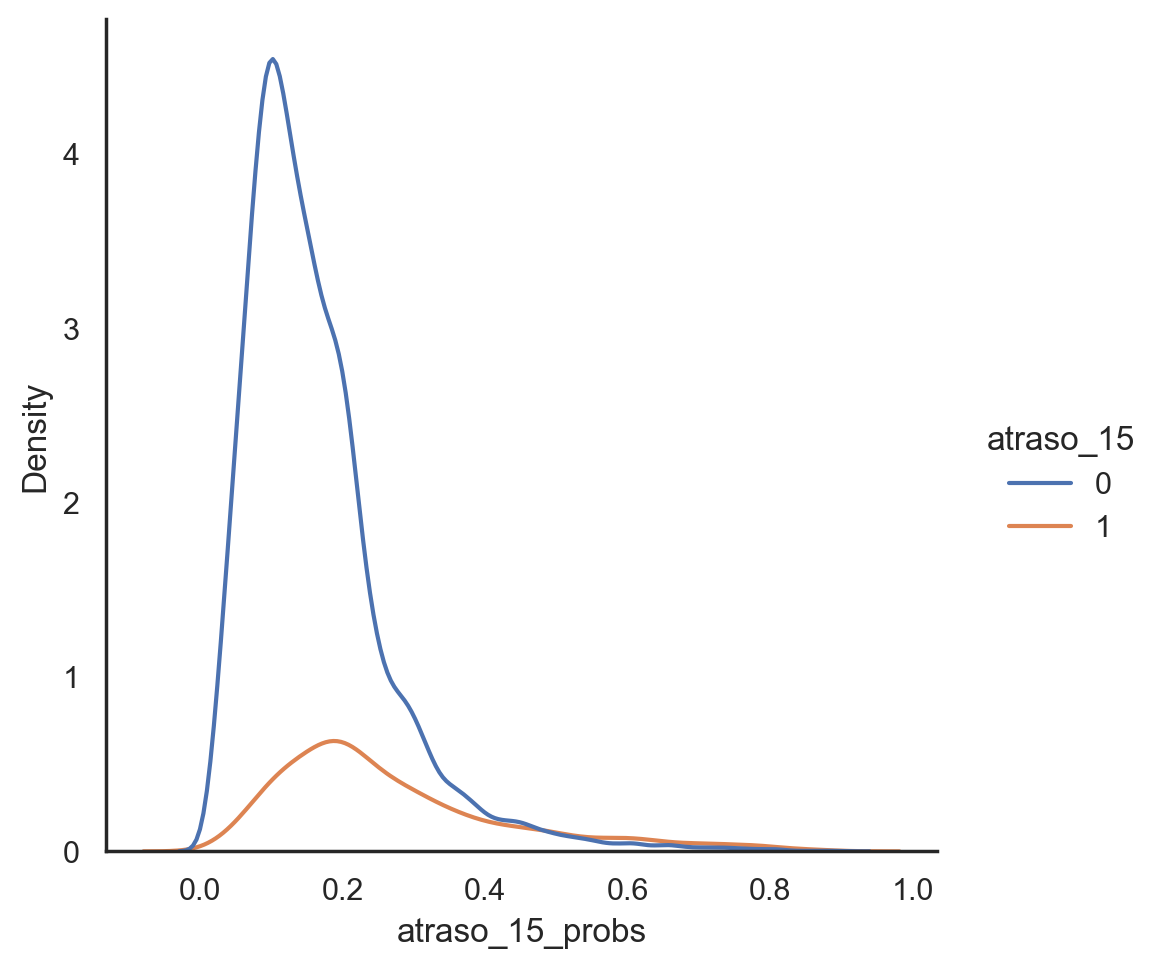

In [14]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7535240725537171
EL ROC AUC Score es: 0.6460150901010376
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     16472
           1       0.37      0.25      0.30      3687

    accuracy                           0.79     20159
   macro avg       0.61      0.58      0.59     20159
weighted avg       0.76      0.79      0.77     20159



Predicted class,False,True,All
Actual class,,,
0,14907,1565,16472
1,2768,919,3687
All,17675,2484,20159


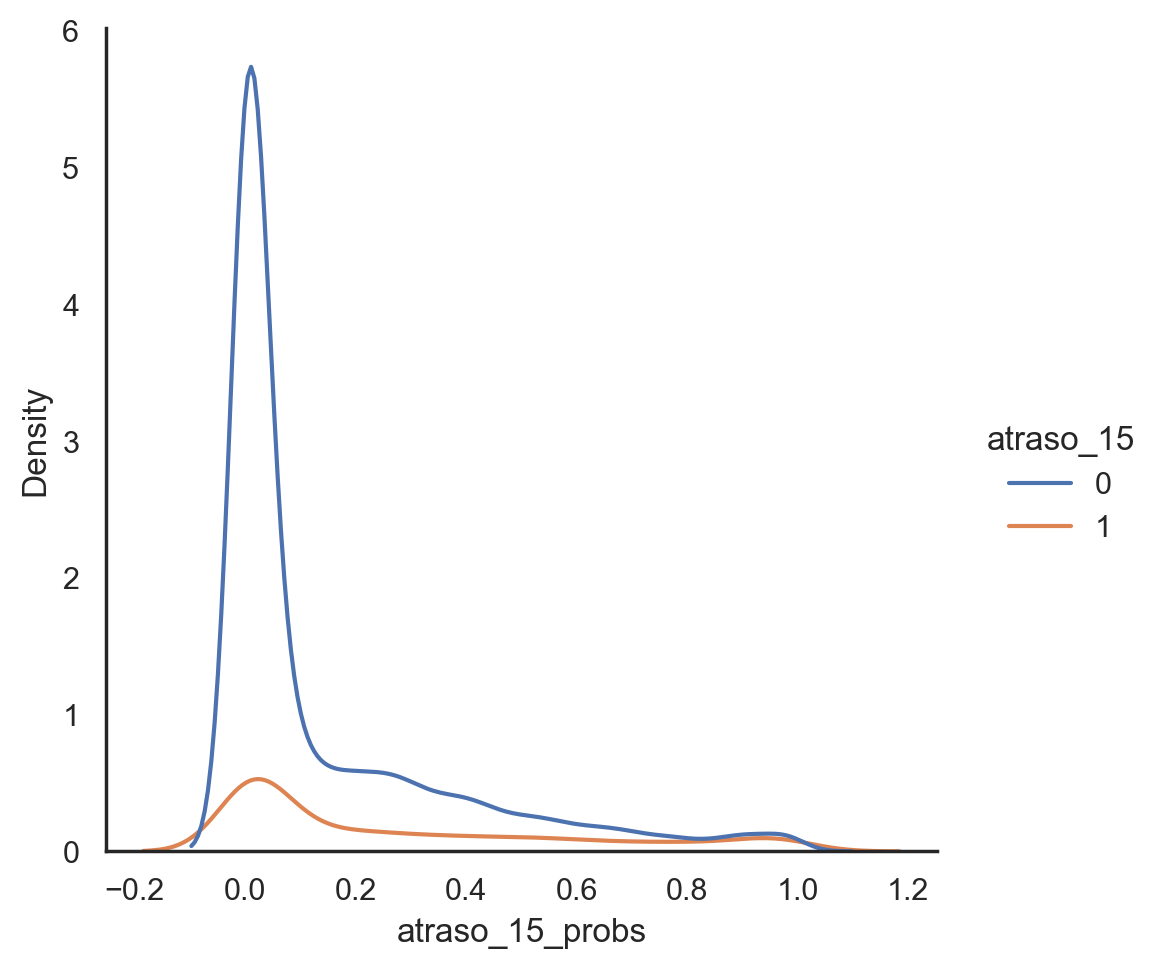

In [16]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");